**Follow the above steps to find dividends, dividend growth rate, and DCF of  5 stocks in SET50, namely**




1.  PTT
2.  AOT
3.  KBANK
4.  CPALL
5.  ADVANC



---


**Here, you will use only the data from 2016-01-01 to 2020-12-31




In [1]:
import pandas as pd
from pandas_datareader import data
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%mathplotlib inline
%config InlineBackend.figure_format='retina'

UsageError: Line magic function `%mathplotlib` not found.


In [2]:
df = data.DataReader('KBANK.bk', data_source="yahoo", 
start='2016-01-01', 
end='2020-12-31')
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,150.0,146.0,150.0,147.5,8013300.0,129.251404
2016-01-05,148.0,145.0,147.5,146.0,8045800.0,127.936928
2016-01-06,149.0,145.5,146.0,148.0,5617300.0,129.689514
2016-01-07,146.5,144.0,145.5,144.0,8933200.0,126.184387
2016-01-08,147.0,145.0,145.0,146.5,6479200.0,128.375076


Text(0, 0.5, 'Difference in Change')

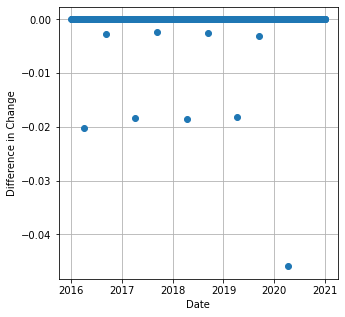

In [9]:

adj_close = df['Adj Close'] # adjusted close prices
pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
close = df['Close'] # close price
pct_close = close.pct_change(1) # find daily percent changes 
plt.figure(figsize=(5,5))
plt.plot(pct_close- pct_adj_close, "o")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Difference in Change")

In [4]:
delta = pct_close- pct_adj_close 
threshold = -0.001 # We pick threshold = -0.001 from the graph.
delta = delta[delta<threshold] # screen only the location where differences is less than -0.001
print("The dividens are paid out on:")
for date in delta.index:
  print(date.date())

The dividens are paid out on:
2016-04-05
2016-09-06
2017-04-07
2017-09-12
2018-04-11
2018-09-12
2019-04-11
2019-09-11
2020-04-09


In [5]:
dividends =[]
for date in delta.index:
  k = np.nonzero(df.index==date)[0][0] # find the row where dividends have been paid.
  close_before = close[k-1]
  pct_close_div = pct_close[k]
  pct_adj_div = pct_adj_close[k]
  dividend = close_before * ( pct_adj_div - pct_close_div)
  dividends.append(dividend)
dividends = pd.Series(dividends, index=delta.index)
print(dividends)

Date
2016-04-05    3.404239
2016-09-06    0.501332
2017-04-07    3.564471
2017-09-12    0.496475
2018-04-11    3.635660
2018-09-12    0.508629
2019-04-11    3.518457
2019-09-11    0.512129
2020-04-09    4.594241
dtype: float64


In [6]:
yearly_dividends = []
for y in range(2016,2021): # Find dividens growth rate in the last 5 years.
  dividend_year = dividends[dividends.index.year == y] #filter only one year
  yearly_dividends.append(dividend_year.sum()) # find total dividens per year
yearly_dividends = pd.Series(yearly_dividends, index=np.arange(2016,2021))
dividend_growth = yearly_dividends.pct_change(1).dropna()
print("Yearly dividends: ")
print(yearly_dividends)
print("Dividend growth rate: ")
print(dividend_growth)
g = dividend_growth.median()
print(f"Dividends growth rate is {g*100} %.")

Yearly dividends: 
2016    3.905570
2017    4.060947
2018    4.144288
2019    4.030586
2020    4.594241
dtype: float64
Dividend growth rate: 
2017    0.039783
2018    0.020523
2019   -0.027436
2020    0.139845
dtype: float64
Dividends growth rate is 3.015296811474988 %.


In [8]:
r = 0.1 # Assume that we can find the risk-free security at 10%
S_KBANK = yearly_dividends[2020]/(r - g) # D1/(r - g)
print(f"The current KBANK stock price is {adj_close.iloc[-1]}.") # 
print(f"From the Discounted Cash Flow model, KBANK Stock price is {S_AOT}.")


The current KBANK stock price is 113.0.
From the Discounted Cash Flow model, KBANK Stock price is 65.77574900024526.
